# **Proyek Analisis Data: "Air Quality in China" Dataset**
- **Nama:** Arum Puspadewi
- **Email:** arumpd171@gmail.com
- **ID Dicoding:** arum_puspadewi

## **Menentukan Pertanyaan Bisnis**

- Apa korelasi antara O3 (Ozone) dengan cuaca?
- Bagaimana kondisi CO (Carbon Monoxide) di setiap statiun per tahunnya?

## **Import Semua Packages/Library yang Digunakan**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests as req
from io import StringIO

## **Data Wrangling**

### **Gathering Data**

**Air Quality Dataset**

Source of the data: https://github.com/marceloreis/HTI/tree/master

Karena setiap database yang ada memiliki format yang sama hanya saja berbeda kota, maka seluruh data akan dijadikan satu di suatu variabel `air_df`.

In [3]:
# List berisi URL data
urls = [
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Changping_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Dingling_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Dongsi_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Guanyuan_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Gucheng_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Shunyi_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Tiantan_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanliu_20130301-20170228.csv',
    'https://github.com/marceloreis/HTI/raw/master/PRSA_Data_20130301-20170228/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# List untuk menyimpan data
all_df = []

# Iterasi setiap URL yang ada
for url in urls:
  # Mengambil konten CSV dari URL
  response = req.get(url)
  # Membaca konten dari CSV menjadi DataFrame
  df = pd.read_csv(StringIO(response.text))
  # Menambahkan DataFrame ke dalam list
  all_df.append(df)

# Menggabungkan semua DataFrame yang ada di list menjadi satu DataFrame
air_df = pd.concat(all_df, ignore_index=True)

air_df['datetime'] = pd.to_datetime(air_df[['year', 'month', 'day', 'hour']])

# Menampilkan 5 baris pertama isi dari data yang ada
air_df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


### **Assessing Data**

#### Memeriksa info mengenai data

In [4]:
# Memeriksa tipe data dari tiap kolom yang ada
air_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 19 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   No        420768 non-null  int64         
 1   year      420768 non-null  int64         
 2   month     420768 non-null  int64         
 3   day       420768 non-null  int64         
 4   hour      420768 non-null  int64         
 5   PM2.5     412029 non-null  float64       
 6   PM10      414319 non-null  float64       
 7   SO2       411747 non-null  float64       
 8   NO2       408652 non-null  float64       
 9   CO        400067 non-null  float64       
 10  O3        407491 non-null  float64       
 11  TEMP      420370 non-null  float64       
 12  PRES      420375 non-null  float64       
 13  DEWP      420365 non-null  float64       
 14  RAIN      420378 non-null  float64       
 15  wd        418946 non-null  object        
 16  WSPM      420450 non-null  float64    

Diketahui tipe dari setiap data dan didapat bahwa terdapat jumlah data yang berbeda untuk beberapa tiap-tiap datanya.


#### Memeriksa ringkasan parameter statistik

In [5]:
# Menampilkan ringkasan parameter statistik
air_df.describe(include='all')

<ipython-input-5-4c66494b8edf>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  air_df.describe(include='all')


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,418946,420450.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,35064
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,2013-03-01 00:00:00
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43335,NaN,35064,12
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-01 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 23:00:00
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,NaN,1.729711,NaN,NaN
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,NaN,1.246386,NaN,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,NaN


In [6]:
air_df.median()

<ipython-input-6-8b3485474445>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  air_df.median()
<ipython-input-6-8b3485474445>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  air_df.median()


No       17532.5
year      2015.0
month        7.0
day         16.0
hour        11.5
PM2.5       55.0
PM10        82.0
SO2          7.0
NO2         43.0
CO         900.0
O3          45.0
TEMP        14.5
PRES      1010.4
DEWP         3.1
RAIN         0.0
WSPM         1.4
dtype: float64

In [7]:
air_df.mode()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
0,1,2016.0,1.0,1.0,0.0,3.0,6.0,2.0,16.0,300.0,2.0,3.0,1019.0,17.6,0.0,NE,1.1,Aotizhongxin,2013-03-01 00:00:00
1,2,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Changping,2013-03-01 01:00:00
2,3,NaN,5.0,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dingling,2013-03-01 02:00:00
3,4,NaN,7.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Dongsi,2013-03-01 03:00:00
4,5,NaN,8.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Guanyuan,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 19:00:00
35060,35061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 20:00:00
35061,35062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 21:00:00
35062,35063,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017-02-28 22:00:00


Didapat bahwa distribusi data berupa **right-skewed distribution**

#### Mengidentifikasi missing values

In [8]:
# Memastikan keberadaan missing values
air_df.isna().sum()

No              0
year            0
month           0
day             0
hour            0
PM2.5        8739
PM10         6449
SO2          9021
NO2         12116
CO          20701
O3          13277
TEMP          398
PRES          393
DEWP          403
RAIN          390
wd           1822
WSPM          318
station         0
datetime        0
dtype: int64

In [9]:
# Mendapat persentase missing values
air_df.isna().mean() * 100

No          0.000000
year        0.000000
month       0.000000
day         0.000000
hour        0.000000
PM2.5       2.076916
PM10        1.532674
SO2         2.143937
NO2         2.879497
CO          4.919813
O3          3.155421
TEMP        0.094589
PRES        0.093401
DEWP        0.095777
RAIN        0.092688
wd          0.433018
WSPM        0.075576
station     0.000000
datetime    0.000000
dtype: float64

Terbukti bahwa terdapat jenis data yang **memiliki missing value** yaitu PM2.5, PM10 , SO2, NO2, CO, O3, TEMP, PRES, DEWP, RAIN, wd, dan WSPM. Namun persentase missing values-nya relatif kecil sehingga masih dapat dikatakan data tersebut lengkap.

#### Mengidentifikasi duplikasi data

In [10]:
# Mengecek duplikasi data
print("Jumlah duplikasi: ", air_df.duplicated().sum())

Jumlah duplikasi:  0


Didapat bahwa **tidak ada data yang terduplikasi**.

#### Mengidentifikasi outlier

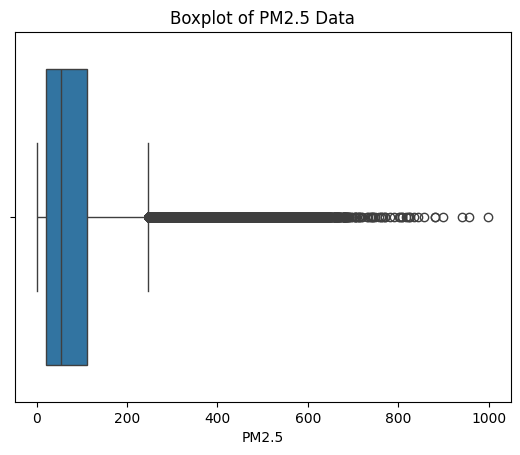

In [11]:
sns.boxplot(x=air_df['PM2.5'])
plt.title("Boxplot of PM2.5 Data")
plt.xlabel("PM2.5")
plt.show()

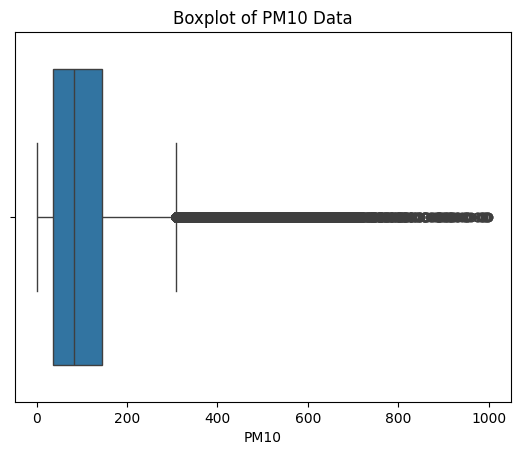

In [12]:
sns.boxplot(x=air_df['PM10'])
plt.title("Boxplot of PM10 Data")
plt.xlabel("PM10")
plt.show()

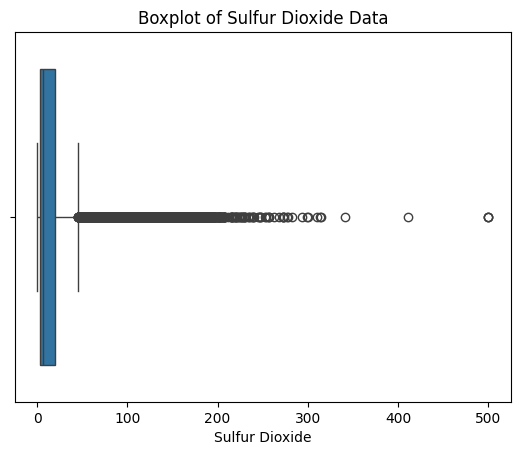

In [13]:
sns.boxplot(x=air_df['SO2'])
plt.title("Boxplot of Sulfur Dioxide Data")
plt.xlabel("Sulfur Dioxide")
plt.show()

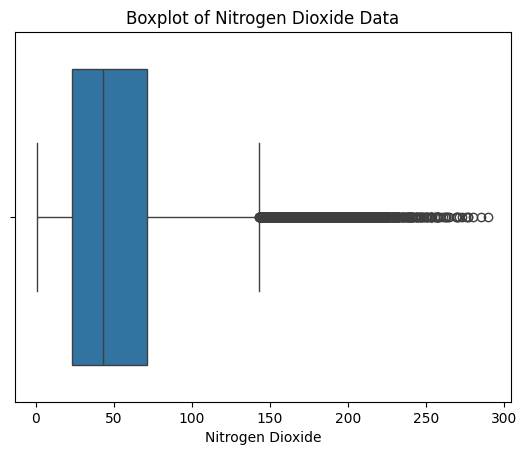

In [14]:
sns.boxplot(x=air_df['NO2'])
plt.title("Boxplot of Nitrogen Dioxide Data")
plt.xlabel("Nitrogen Dioxide")
plt.show()

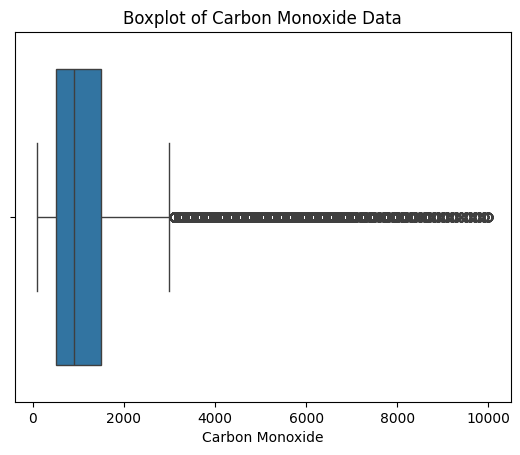

In [15]:
sns.boxplot(x=air_df['CO'])
plt.title("Boxplot of Carbon Monoxide Data")
plt.xlabel("Carbon Monoxide")
plt.show()

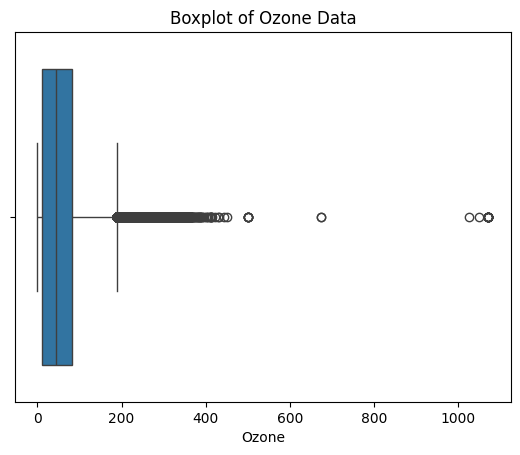

In [16]:
sns.boxplot(x=air_df['O3'])
plt.title("Boxplot of Ozone Data")
plt.xlabel("Ozone")
plt.show()

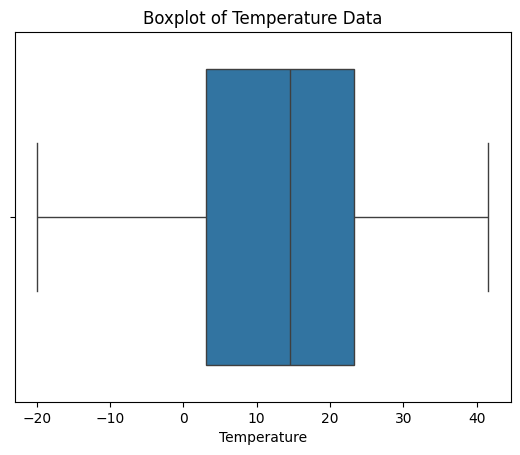

In [17]:
sns.boxplot(x=air_df['TEMP'])
plt.title("Boxplot of Temperature Data")
plt.xlabel("Temperature")
plt.show()

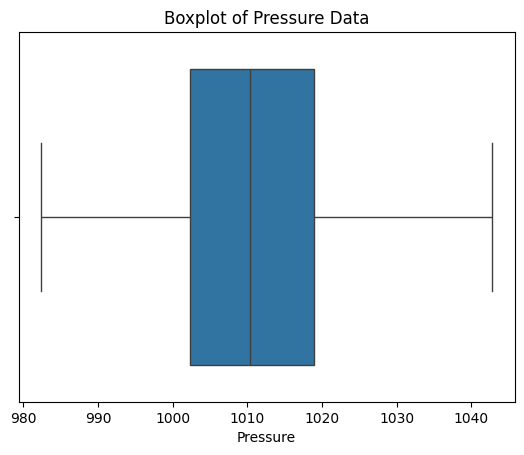

In [18]:
sns.boxplot(x=air_df['PRES'])
plt.title("Boxplot of Pressure Data")
plt.xlabel("Pressure")
plt.show()

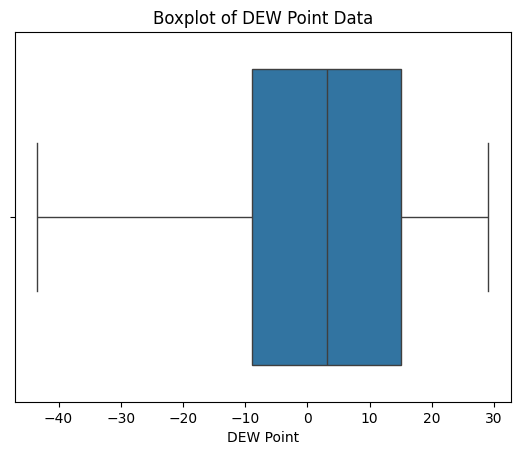

In [19]:
sns.boxplot(x=air_df['DEWP'])
plt.title("Boxplot of DEW Point Data")
plt.xlabel("DEW Point")
plt.show()

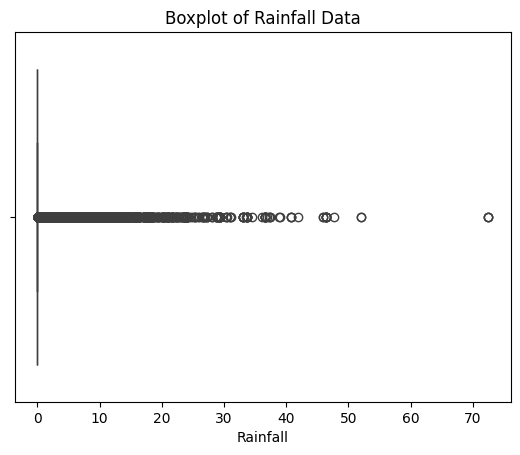

In [20]:
sns.boxplot(x=air_df['RAIN'])
plt.title("Boxplot of Rainfall Data")
plt.xlabel("Rainfall")
plt.show()

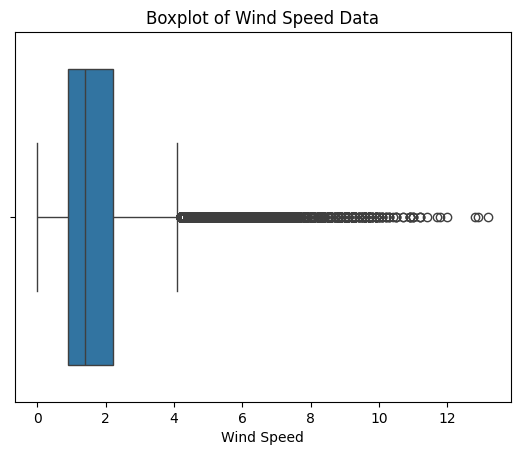

In [21]:
sns.boxplot(x=air_df['WSPM'])
plt.title("Boxplot of Wind Speed Data")
plt.xlabel("Wind Speed")
plt.show()

### **Cleaning Data**

Menangani **missing value**

Karena data kualitas udara ini terbilang cukup lengkap dan datanya terhubung dengan time series, maka akan ditangani dengan forward fill.

In [22]:
# Menangani missing value dengan forward fill
air_df_imputed = air_df.fillna(method='ffill')

# Memastikan kembali tidak ada data dengan missing values
print(air_df_imputed.isnull().sum())

No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
PRES        0
DEWP        0
RAIN        0
wd          0
WSPM        0
station     0
datetime    0
dtype: int64


### **Saving Clean Data File**

In [23]:
air_df_imputed.to_csv('all_data.csv', index=False)

## **Exploratory Data Analysis (EDA)**

### **Explore Air Quality in China Data**

In [24]:
# Menampilkan ringkasan parameter statistik
air_df_imputed.describe(include="all", datetime_is_numeric=True)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768,420768.000000,420768,420768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,12,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,NaN,Aotizhongxin,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,43653,NaN,35064,NaN
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,80.150342,105.062381,15.933593,50.534833,1240.240736,57.443719,13.531801,1010.753501,2.482413,0.064436,NaN,1.729789,NaN,2015-03-01 11:30:00.000001024
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,NaN,0.000000,NaN,2013-03-01 00:00:00
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,NaN,0.900000,NaN,2014-03-01 05:45:00
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,NaN,1.400000,NaN,2015-03-01 11:30:00
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,146.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,NaN,2.200000,NaN,2016-02-29 17:15:00
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,NaN,13.200000,NaN,2017-02-28 23:00:00


Telah dipastikan bahwa dalam setiap parameternya telah memiliki jumlah data yang sama. Value data-data juga dirasa tidak bermasalah. Maka akan dilanjutkan pemeriksaan untuk setiap pertanyaan yang ada.



### **Korelasi antara O3 (Ozone) dengan cuaca**

In [25]:
correlation_matrix = air_df_imputed[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']].corr()
correlation_matrix

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
PM2.5,1.000000,0.876213,0.469207,0.654277,0.773015,-0.144707,-0.130454,0.019145,0.112820,-0.014153,-0.269565
PM10,0.876213,1.000000,0.453617,0.639971,0.686354,-0.107736,-0.096779,-0.017285,0.066883,-0.026234,-0.177755
SO2,0.469207,0.453617,1.000000,0.476857,0.514696,-0.162745,-0.316100,0.218482,-0.262355,-0.039387,-0.107568
NO2,0.654277,0.639971,0.476857,1.000000,0.682958,-0.454530,-0.269755,0.170195,-0.028799,-0.043276,-0.392141
CO,0.773015,0.686354,0.514696,0.682958,1.000000,-0.302272,-0.328008,0.192233,-0.066732,-0.013269,-0.286503
O3,-0.144707,-0.107736,-0.162745,-0.454530,-0.302272,1.000000,0.582970,-0.442192,0.310183,0.023140,0.287950
TEMP,-0.130454,-0.096779,-0.316100,-0.269755,-0.328008,0.582970,1.000000,-0.813310,0.820279,0.037629,0.032725
PRES,0.019145,-0.017285,0.218482,0.170195,0.192233,-0.442192,-0.813310,1.000000,-0.750293,-0.060941,0.065323
DEWP,0.112820,0.066883,-0.262355,-0.028799,-0.066732,0.310183,0.820279,-0.750293,1.000000,0.086248,-0.296651
RAIN,-0.014153,-0.026234,-0.039387,-0.043276,-0.013269,0.023140,0.037629,-0.060941,0.086248,1.000000,0.020979


Dari tabel di atas, didapat korelasi antar setiap parameter. Kali ini akan lebih difokuskan korelasi antara Ozone (O3) dengan parameter cuaca. Didapat bahwa :
* Ozone (O3) berkorelasi negatif dengan Presure (PRES)
* Ozone (O3) berkorelasi relatif netral terhadap Rainfall (RAIN)
* Ozone (O3) berkorelasi positif dengan Temperature (TEMP), DEW Point (DEWP), dan Wind Speed (WSPM)



### **kondisi CO (Carbon Monoxide) di setiap statiun per tahunnya**

In [26]:
grouped_data = air_df_imputed.groupby(by=["station","year"]).agg({
    "CO": "mean"
}).sort_values(by=["station","year"])

grouped_data

CO
station       year             
Aotizhongxin  2013  1139.012936
              2014  1215.445205
              2015  1438.047945
              2016  1190.926685
              2017  1665.254237
Changping     2013  1034.817810
              2014  1227.488584
              2015  1167.077626
              2016  1129.257741
              2017  1539.689266
Dingling      2013   940.716231
              2014   892.808219
              2015   963.949772
              2016   866.723588
              2017  1157.132768
Dongsi        2013  1463.957380
              2014  1383.881279
              2015  1339.954338
              2016  1238.376594
              2017  1631.920904
Guanyuan      2013  1088.123911
              2014  1354.531963
              2015  1314.041096
              2016  1166.029144
              2017  1484.957627
Gucheng       2013  1408.311683
              2014  1445.319635
              2015  1321.894977
              2016  1171.345628
              2017  1806.920904
Huairou       2013   982.717048
              2014  1078.972603
              2015  1040.148402
              2016   934.403461
              2017  1314.336158
Nongzhanguan  2013  1285.122958
              2014  1350.913242
              2015  1383.173516
              2016  1209.505920
              2017  1732.203390
Shunyi        2013  1261.380583
              2014  1176.872146
              2015  1186.210046
              2016  1106.147541
              2017  1790.042373
Tiantan       2013  1317.089597
              2014  1342.602740
              2015  1303.470320
              2016  1195.992714
              2017  1776.553672
Wanliu        2013  1303.871460
              2014  1382.374429
              2015  1327.636986
              2016  1232.035519
              2017  1805.932203
Wanshouxigong 2013  1412.720724
              2014  1453.504566
              2015  1369.406393
              2016  1219.911202
              2017  1737.782486

In [31]:
# Temukan indeks nilai minimum CO
idx_min_CO = grouped_data['CO'].idxmin()

# Temukan indeks nilai maksimum CO
idx_max_CO = grouped_data['CO'].idxmax()

# Dapatkan nilai stasiun dan tahun dengan nilai CO terkecil
min_station, min_year = idx_min_CO
min_CO = grouped_data.loc[idx_min_CO]['CO']

# Dapatkan nilai stasiun dan tahun dengan nilai CO terbesar
max_station, max_year = idx_max_CO
max_CO = grouped_data.loc[idx_max_CO]['CO']

# Tampilkan hasil
print("Nilai CO terkecil:")
print(f"Stasiun: {min_station}, Tahun: {min_year}, CO: {min_CO}")

print("\nNilai CO terbesar:")
print(f"Stasiun: {max_station}, Tahun: {max_year}, CO: {max_CO}")

Nilai CO terkecil:
Stasiun: Dingling, Tahun: 2016, CO: 866.7235883424408

Nilai CO terbesar:
Stasiun: Gucheng, Tahun: 2017, CO: 1806.9209039548023


Didapatkan nilai rata-rata konsentrasi CO dari setiap stasiun dan tahunnya beragam dari 866 sampai 1807 dimana nilai terkecil didapat dari stasiun Dingling pada tahun 2016 dan nilai terbesar didapat dari stasiun Gucheng pada tahun 2017. Agar dapat melihat perbandingannya dengan jelas, maka selanjutnya akan dibuat visualisasi datanya pada section berikut ini.

## **Visualization & Explanatory Analysis**

### **Korelasi antara O3 (Ozone) dengan cuaca**



Dari EDA sebelumnya, dapat dibentuk visualisasi sebagai berikut.

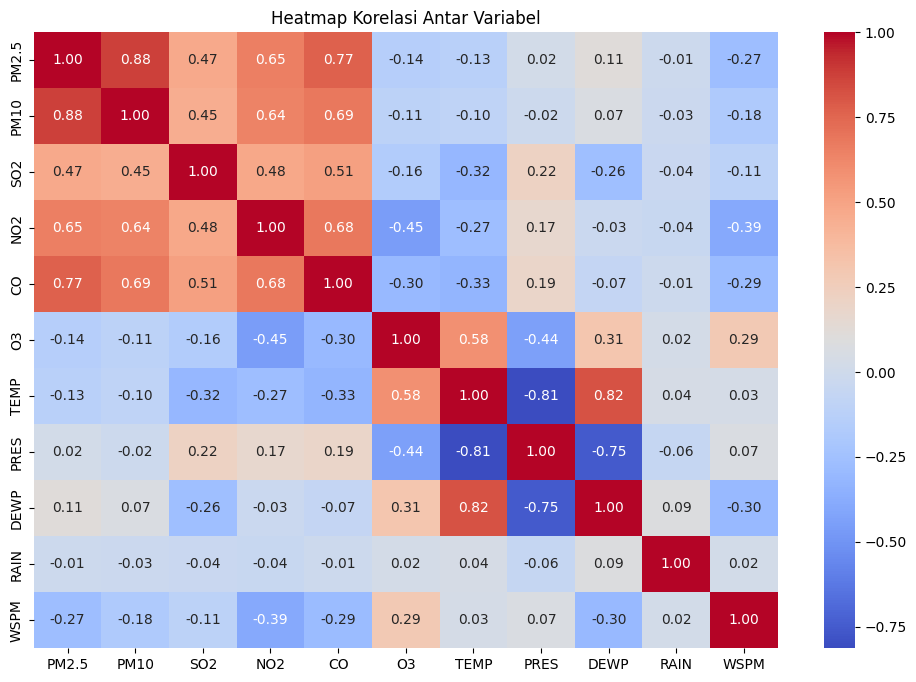

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()

### **kondisi CO (Carbon Monoxide) di setiap statiun per tahunnya**

Dari EDA sebelumnya, dapat dibentuk visualisasi sebagai berikut.

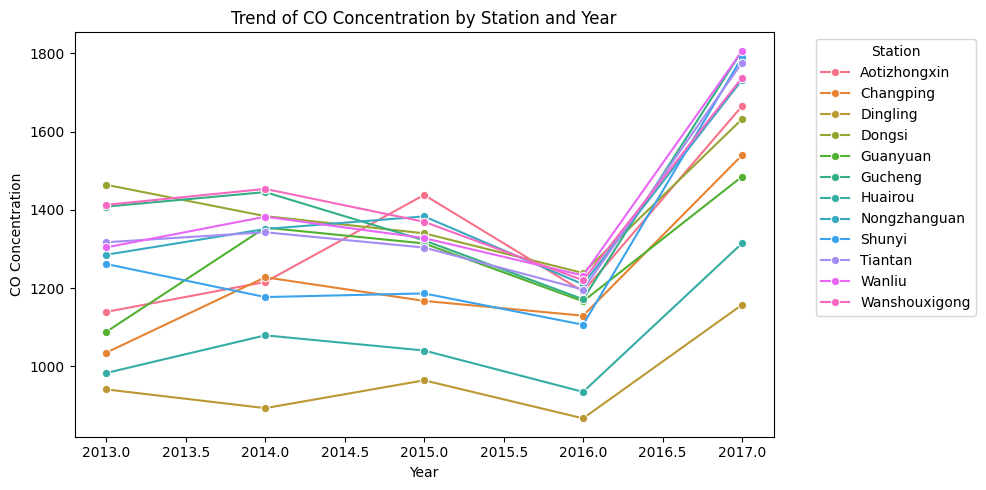

In [28]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=grouped_data, x="year", y="CO", hue="station", marker='o')
plt.title('Trend of CO Concentration by Station and Year')
plt.xlabel('Year')
plt.ylabel('CO Concentration')
# plt.xticks(rotation=45)
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## **Conclusion**

**Apa korelasi antara O3 (Ozone) dengan cuaca?**

* **Ozone (O3) berkorelasi negatif dengan Presure (PRES)**. Tekanan udara yang tinggi berkontribusi pada kondisi cuaca yang lebih stabil sehingga dapat mengurangi pembentukan ozon.
* **Ozone (O3) berkorelasi relatif netral terhadap Rainfall (RAIN)**. Sehingga hujan tidak memiliki pengaruh yang signifikan terhadap konsentrasi ozon.
* **Ozone (O3) berkorelasi positif dengan Temperature (TEMP), DEW Point (DEWP), dan Wind Speed (WSPM)** dengan urutan dari yang paling berkorelasi ke yang kurang berkorelasi. Didapat bahwa peningkatan suhu, titik embun, dan kecepatan angin cenderung menyertai peningkatan konsentrasi ozon.




**Bagaimana kondisi CO (Carbon Monoxide) di setiap statiun per tahunnya?**

* Secara keseluruhan di setiap stasiun mendapatkan skor terendah di tahun 2016 dan langsung menjulang tinggi di tahun 2017.
* Untuk daerah yang paling sehat dari karbon monoksida (CO) di tiap tahunnya adalah Dingling.
* Untuk daerah yang memiliki CO (Carbon Monoxide) paling besar konsentrasinya berbeda di setiap tahunnya, dimana yang paling maksimal nilainya adalah dari daerah Gucheng di tahun 2017.